# Optical functions & Proton transport

### Auxiliary class to handle optical functions

In [1]:
from SimpleLHCPropagator import *

Welcome to JupyROOT 6.14/09


In [2]:
help(SimpleLHCPropagator)

Help on class SimpleLHCPropagator in module SimpleLHCPropagator:

class SimpleLHCPropagator
 |  Methods defined here:
 |  
 |  __init__(self, files, verbose=False)
 |  
 |  draw_function(self, xangle, rpid, tag)
 |  
 |  draw_function_vs_rpid(self, xangle, tag)
 |  
 |  draw_function_vs_xangle(self, rpid, tag)
 |  
 |  eval(self, rpid, xangle, tag, x)
 |  
 |  get_function(self, xangle, rpid, tag)
 |  
 |  of_tags(self)
 |  
 |  rp_index(self, key)
 |  
 |  set_verbose(self, flag)
 |  
 |  transport(self, rpid, xangle, kinematics)



### For a given optics configuration, load optical functions for a set of principal crossing angles

***Dont forget*** to run `voms-proxy-init --voms cms` from the terminal first.

The optical functions are stored in [cms-data/CalibPPS-ESProducers](https://github.com/cms-data/CalibPPS-ESProducers/tree/master/optical_functions) and might be updated during the run.

In [3]:
files = {
    120: "root://cmseos.fnal.gov//store/user/cmsdas/2022/short_exercises/pps-protons-tutorial/optical_functions/2017/version4/120urad.root",
    130: "root://cmseos.fnal.gov//store/user/cmsdas/2022/short_exercises/pps-protons-tutorial/optical_functions/2017/version4/130urad.root",
    140: "root://cmseos.fnal.gov//store/user/cmsdas/2022/short_exercises/pps-protons-tutorial/optical_functions/2017/version4/140urad.root"
}

proton_transport = SimpleLHCPropagator( files )

Accessing optical functions for crossing angle 120
Accessing XRPH_D6L5_B2/g_x_D_vs_xi
Accessing XRPH_D6L5_B2/g_v_x_vs_xi
Accessing XRPH_D6L5_B2/g_L_x_vs_xi
Accessing XRPH_D6L5_B2/g_y_D_vs_xi
Accessing XRPH_D6L5_B2/g_v_y_vs_xi
Accessing XRPH_D6L5_B2/g_L_y_vs_xi
Accessing XRPH_D6R5_B1/g_x_D_vs_xi
Accessing XRPH_D6R5_B1/g_v_x_vs_xi
Accessing XRPH_D6R5_B1/g_L_x_vs_xi
Accessing XRPH_D6R5_B1/g_y_D_vs_xi
Accessing XRPH_D6R5_B1/g_v_y_vs_xi
Accessing XRPH_D6R5_B1/g_L_y_vs_xi
Accessing XRPH_E6L5_B2/g_x_D_vs_xi
Accessing XRPH_E6L5_B2/g_v_x_vs_xi
Accessing XRPH_E6L5_B2/g_L_x_vs_xi
Accessing XRPH_E6L5_B2/g_y_D_vs_xi
Accessing XRPH_E6L5_B2/g_v_y_vs_xi
Accessing XRPH_E6L5_B2/g_L_y_vs_xi
Accessing XRPH_E6R5_B1/g_x_D_vs_xi
Accessing XRPH_E6R5_B1/g_v_x_vs_xi
Accessing XRPH_E6R5_B1/g_L_x_vs_xi
Accessing XRPH_E6R5_B1/g_y_D_vs_xi
Accessing XRPH_E6R5_B1/g_v_y_vs_xi
Accessing XRPH_E6R5_B1/g_L_y_vs_xi
Accessing XRPH_B6L5_B2/g_x_D_vs_xi
Accessing XRPH_B6L5_B2/g_v_x_vs_xi
Accessing XRPH_B6L5_B2/g_L_x_vs_xi
Acce

### Optical functions

A Proton that energe intact from the intraction, will remain inside the beam, but it will be diflected differently by the LHC optics resolting in displacement from the beam center. Protons can be parameterized using 5 kinematics parameters:
   * ($x^*, y^*$) - coordinates of the interation point 
   * ($\theta_x^*, \theta_y^*$) - proton scattering angle
   * $\xi$ - proton momentum loss

The transverse position of the proton ($x,y$), that passes detector plane in Roman Pot (RP) determined by the beam optics, and it related to proton kinematic parameters:
$$ x = v_x\cdot x^* + L_x\cdot \theta_x^* + D_{x}(\xi)\cdot\xi $$ 
$$ y = v_y\cdot y^* + L_y\cdot \theta_y^* + D_{y}(\xi)\cdot\xi $$ 

Where $D(\xi)$ is the dispersion of the mathine, $L$ is the effective length and $v$ is the magnification parameter.

#### Draw an optical function

Example of the optical function of dispersion along the x-axis for different proton momentum losses. Note that the inverse of this function can be used to translate the x-coordinate of the proton track to the proton's momentum loss. 

$$ x = D_{x}(\xi)\times\xi $$ 

('Tags:', ('x_D', 'v_x', 'L_x', 'y_D', 'v_y', 'L_y'))


(<ROOT.TSpline3 object ("Spline3") at 0x742c580>,
 <ROOT.TCanvas object ("canvas_120_23_x_D") at 0x7812cc0>)

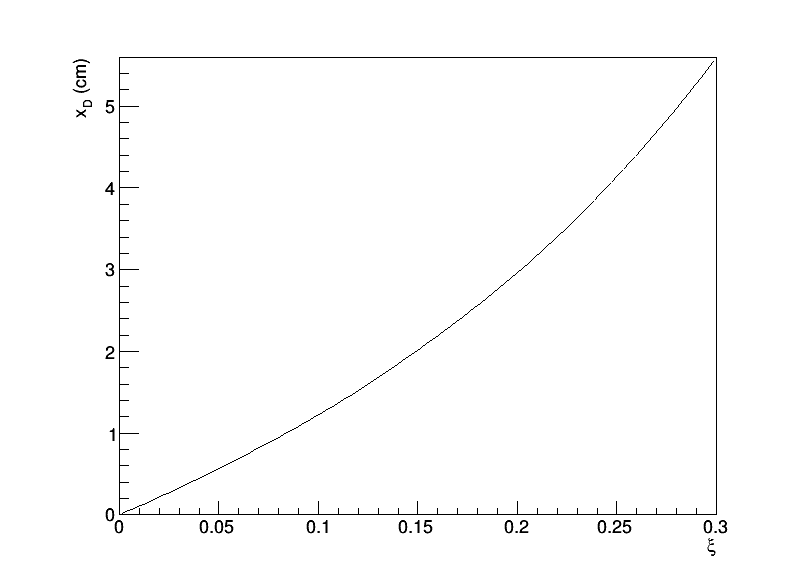

In [4]:
print ( "Tags:", proton_transport.of_tags() )

proton_transport.draw_function( 120, 23, "x_D" )

#### Draw an optical function at different RPs

([<ROOT.TSpline3 object ("Spline3") at 0x738de20>,
  <ROOT.TSpline3 object ("Spline3") at 0x73995e0>,
  <ROOT.TSpline3 object ("Spline3") at 0x739da60>,
  <ROOT.TSpline3 object ("Spline3") at 0x73f3880>,
  <ROOT.TSpline3 object ("Spline3") at 0x742c580>,
  <ROOT.TSpline3 object ("Spline3") at 0x7440a00>],
 <ROOT.TCanvas object ("canvas_120_x_D") at 0x7a6f350>,
 <ROOT.TLegend object ("TPave") at 0x7b65a10>)

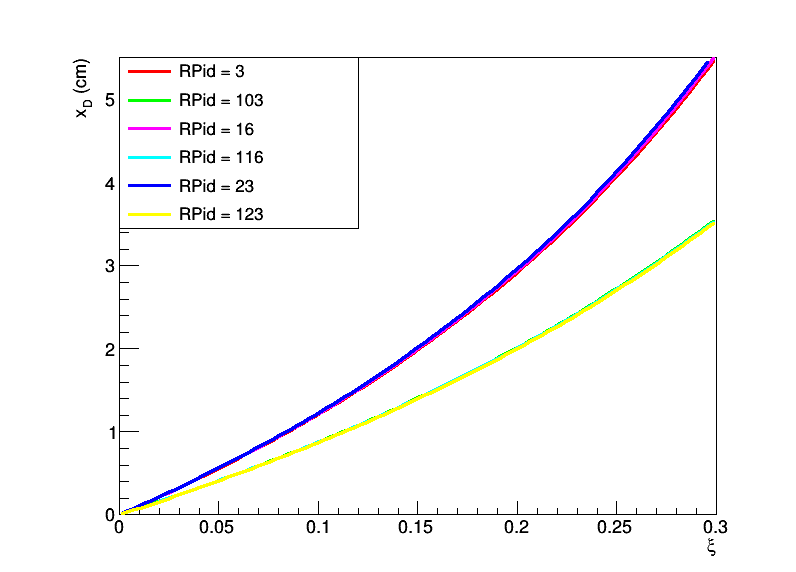

In [5]:
proton_transport.draw_function_vs_rpid( 120, "x_D" )

#### Draw an optical function for different crossing angles

([<ROOT.TSpline3 object ("Spline3") at 0x742c580>,
  <ROOT.TSpline3 object ("Spline3") at 0x74d14d0>,
  <ROOT.TSpline3 object ("Spline3") at 0x7607d30>],
 <ROOT.TCanvas object ("canvas_23_x_D") at 0x7b7fea0>,
 <ROOT.TLegend object ("TPave") at 0x7bb9370>)

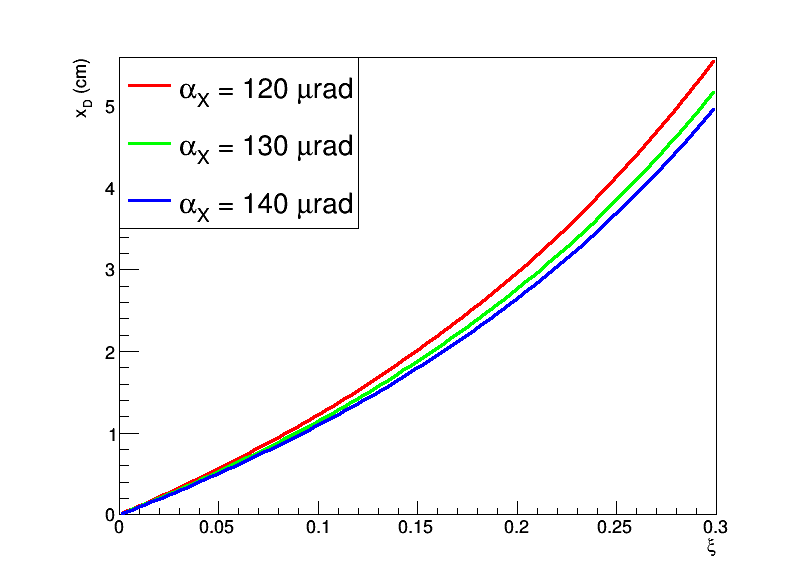

In [6]:
proton_transport.draw_function_vs_xangle( 23, "x_D" )

### Find proton position at detectors

#### For increasing $\xi$ values

`transport(rpid, xangle, kinematics)`

kinematics = (x, $\theta_x$, y, $\theta_y$, $\xi$ )

In [7]:
proton_transport.set_verbose( True )
proton_transport.transport( 23, 120., (0., 0., 0., 0., 0.05) )
proton_transport.transport( 23, 120., (0., 0., 0., 0., 0.10) )
proton_transport.transport( 23, 120., (0., 0., 0., 0., 0.15) )
proton_transport.transport( 23, 120., (0., 0., 0., 0., 0.20) )
proton_transport.set_verbose( False )

('Principal crossing angle values:', [120, 130, 140])
Interpolate: False
{'x_D': 0.5629041130988695, 'L_x': -1381.9138723270034, 'L_y': -1431.572684928527, 'v_x': -4.302739529591844, 'v_y': -4.644679025957877, 'y_D': 0.0675}
Transverse position in detector: (0.562904113099,0.0675)
RP position: -21955.0
('Principal crossing angle values:', [120, 130, 140])
Interpolate: False
{'x_D': 1.2246011518636664, 'L_x': -3203.3535023747236, 'L_y': -4257.654101722615, 'v_x': -4.486969370668245, 'v_y': -5.460386494151815, 'y_D': 0.135}
Transverse position in detector: (1.22460115186,0.135)
RP position: -21955.0
('Principal crossing angle values:', [120, 130, 140])
Interpolate: False
{'x_D': 2.0125188024550473, 'L_x': -5208.019083270811, 'L_y': -7575.361058236707, 'v_x': -4.634983234081951, 'v_y': -6.428726626258103, 'y_D': 0.20249999999999999}
Transverse position in detector: (2.01251880246,0.2025)
RP position: -21955.0
('Principal crossing angle values:', [120, 130, 140])
Interpolate: False
{'x_D':

#### For different crossing angles

`transport(rpid, xangle, kinematics)`

kinematics = (x, $\theta_x$, y, $\theta_y$, $\xi$ )

In [8]:
proton_transport.set_verbose( True )
proton_transport.transport( 123, 120., (0., 0., 0., 0., 0.10) )
proton_transport.transport( 123, 130., (0., 0., 0., 0., 0.10) )
proton_transport.transport( 123, 140., (0., 0., 0., 0., 0.10) )
proton_transport.transport( 123, 150., (0., 0., 0., 0., 0.10) )
proton_transport.set_verbose( False )

('Principal crossing angle values:', [120, 130, 140])
Interpolate: False
{'x_D': 0.8690549609565529, 'L_x': -3184.031361314049, 'L_y': -4302.310756297797, 'v_x': -4.436980402386566, 'v_y': -5.4920442759520265, 'y_D': 0.202}
Transverse position in detector: (0.869054960957,0.202)
RP position: 21955.0
('Principal crossing angle values:', [120, 130, 140])
Interpolate: False
{'x_D': 0.7856408195958434, 'L_x': -3184.031361314049, 'L_y': -4302.310756297797, 'v_x': -4.436980402386566, 'v_y': -5.4920442759520265, 'y_D': 0.202}
Transverse position in detector: (0.785640819596,0.202)
RP position: 21955.0
('Principal crossing angle values:', [120, 130, 140])
Interpolate: False
{'x_D': 0.7345881200156946, 'L_x': -3184.031361314049, 'L_y': -4302.310756297797, 'v_x': -4.436980402386566, 'v_y': -5.4920442759520265, 'y_D': 0.202}
Transverse position in detector: (0.734588120016,0.202)
RP position: 21955.0
('Principal crossing angle values:', [120, 130, 140])
Interpolate: True
{'x_D': 0.683535420435545

#### Varying $\theta_x$ and $\theta_y$

`transport(rpid, xangle, kinematics)`

kinematics = (x, $\theta_x$, y, $\theta_y$, $\xi$ )

In [9]:
proton_transport.set_verbose( True )
proton_transport.transport( 123, 120., (0., 0., 0., 0., 0.10) )
proton_transport.transport( 123, 120., (0., -50e-06, 0., 0., 0.10) )
proton_transport.transport( 123, 120., (0.,  50e-06, 0., 0., 0.10) )
proton_transport.transport( 123, 120., (0., 0., 0., -50e-06, 0.10) )
proton_transport.transport( 123, 120., (0., 0., 0.,  50e-06, 0.10) )
proton_transport.set_verbose( False )

('Principal crossing angle values:', [120, 130, 140])
Interpolate: False
{'x_D': 0.8690549609565529, 'L_x': -3184.031361314049, 'L_y': -4302.310756297797, 'v_x': -4.436980402386566, 'v_y': -5.4920442759520265, 'y_D': 0.202}
Transverse position in detector: (0.869054960957,0.202)
RP position: 21955.0
('Principal crossing angle values:', [120, 130, 140])
Interpolate: False
{'x_D': 0.8690549609565529, 'L_x': -3184.031361314049, 'L_y': -4302.310756297797, 'v_x': -4.436980402386566, 'v_y': -5.4920442759520265, 'y_D': 0.202}
Transverse position in detector: (1.02825652902,0.202)
RP position: 21955.0
('Principal crossing angle values:', [120, 130, 140])
Interpolate: False
{'x_D': 0.8690549609565529, 'L_x': -3184.031361314049, 'L_y': -4302.310756297797, 'v_x': -4.436980402386566, 'v_y': -5.4920442759520265, 'y_D': 0.202}
Transverse position in detector: (0.709853392891,0.202)
RP position: 21955.0
('Principal crossing angle values:', [120, 130, 140])
Interpolate: False
{'x_D': 0.869054960956552

### Generate a random sample of protons

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

np.random.seed(42)

nevents = 100000
rpid = 123
xangle = 120.
sigma_theta = 60.e-6

xi = 0. + 0.20*np.random.rand( nevents )

x = y = 0
arr_theta = sigma_theta * np.random.randn( nevents, 2 )

data = np.c_[ ( np.ones( nevents ) * x ), arr_theta[:,0],
              ( np.ones( nevents ) * y ), arr_theta[:,1], xi ]

proton_transport.transport( rpid, xangle, data[0] )

f_ = lambda kinematics: proton_transport.transport( rpid, xangle, kinematics )

positions_rp = np.apply_along_axis( f_, 1, data )

Text(0,0.5,'Y (mm)')

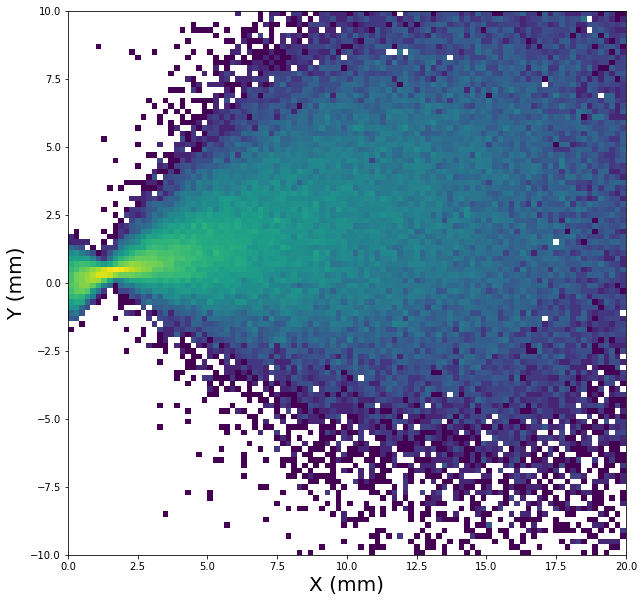

In [11]:
fig = plt.figure( figsize=(10,10) )
counts, xedges, yedges, im = plt.hist2d( positions_rp[:,0]*1e1, positions_rp[:,1]*1e1, bins=(100,100), range=( (0.,20.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
plt.xlabel( "X (mm)", fontsize=20 )
plt.ylabel( "Y (mm)", fontsize=20 )

### Apply an arbitrary cut reflecting the detector horizontal position

Text(0,0.5,'Y (mm)')

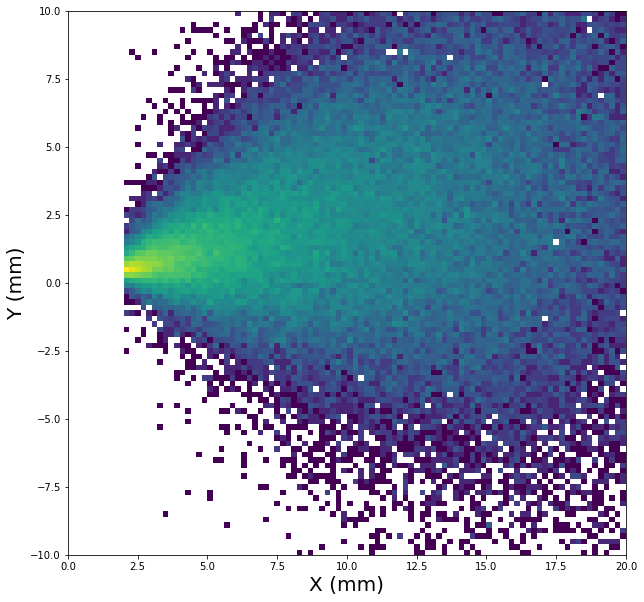

In [12]:
x_min = 0.2
msk = positions_rp[:,0] >= x_min
positions_rp_xcut = positions_rp[ msk, : ]

fig = plt.figure( figsize=(10,10) )
counts, xedges, yedges, im = plt.hist2d( positions_rp_xcut[:,0]*1e1, positions_rp_xcut[:,1]*1e1, bins=(100,100), range=( (0.,20.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
plt.xlabel( "X (mm)", fontsize=20 )
plt.ylabel( "Y (mm)", fontsize=20 )

### Access proton data

First, we will copy the file from the storage to your local area

In [15]:
%%bash
#!/bin/bash
xrdcopy root://cmseos.fnal.gov//store/user/cmsdas/2022/short_exercises/pps-protons-tutorial/data/output-UL2017B-PreSel.h5 output-UL2017B-PreSel.h5

[4.946MB/4.946MB][100%][==================================================][4.946MB/s]  


Prepare pandas dataframe

In [18]:
import pandas as pd
import h5py

fileName = "output-UL2017B-PreSel.h5"

df = None
event_counts = None
selections = None

with h5py.File( fileName, 'r' ) as f:
    #print ( list(f.keys()) )
    dset = f['protons']
    #print ( dset.shape )
    #print ( dset[:,:] )
    dset_columns = f['columns']
    #print ( dset_columns.shape )
    columns = list( dset_columns )
    #print ( columns )
    columns_str = [ item.decode("utf-8") for item in columns ]
    #print ( columns_str )
    
    dset_counts = f['event_counts']
    event_counts = list( dset_counts )
    #print ( event_counts )
    
    dset_selections = f['selections']
    selections_ = list( dset_selections )
    #print ( selections_ )
    selections = [ item.decode("utf-8") for item in selections_ ]
    #print ( selections )
    
    df = pd.DataFrame( dset, columns=columns_str )
    
    df = df[ ['Run', 'LumiSection', 'EventNum', 'CrossingAngle', 
              'MultiRP', 'Arm', 'RPId1', 'RPId2', 'TrackX1', 'TrackY1', 'TrackX2', 'TrackY2',
              'Xi', 'T', 'ThX', 'ThY'] ].astype( { "Run": "int64", "LumiSection": "int64", "EventNum": "int64", "MultiRP": "int32", "Arm": "int32", "RPId1": "int32", "RPId2": "int32" } )
    

Filter the dataframe for events with protons that are reconstructed with the `MultiRP` algorithm, slim the dataframe (select a sub-set of variables) and inspect the dataframe content

In [19]:
df = df[ df["MultiRP"] == 1 ]
df = df[ ['Run', 'LumiSection', 'EventNum', 'CrossingAngle', 'MultiRP', 'Arm', 'RPId1', 'RPId2', 'TrackX1', 'TrackY1', 'TrackX2', 'TrackY2', 'Xi', 'T', 'ThX', 'ThY'] ]
df[:20]

,Run,LumiSection,EventNum,CrossingAngle,MultiRP,Arm,RPId1,RPId2,TrackX1,TrackY1,TrackX2,TrackY2,Xi,T,ThX,ThY
3,297227,55,38079656,120.0,1,1,103,123,4.577393,1.367676,4.395691,1.493408,0.067306,-0.160121,-0.000061,-0.000014
6,297227,56,38791640,120.0,1,1,103,123,8.585938,2.644531,8.483521,2.801025,0.102869,-0.039719,-0.000015,0.000024
11,297227,56,38604580,120.0,1,0,3,23,4.131104,0.797180,4.206665,0.942139,0.036897,-0.315390,0.000015,-0.000087
12,297227,56,38604580,120.0,1,1,103,123,3.514526,1.507568,3.416473,1.723877,0.047317,-0.277554,-0.000034,-0.000076
22,297227,59,40601156,120.0,1,0,3,23,3.521118,0.645874,3.669800,0.839172,0.029943,-0.687121,0.000058,-0.000116
33,297227,70,49904104,120.0,1,0,3,23,9.614258,1.467651,9.968140,1.505981,0.067364,-0.478235,0.000109,-0.000016
36,297227,70,49482508,120.0,1,1,103,123,8.175293,1.603638,8.151611,1.696777,0.091017,-0.046286,0.000012,0.000029
39,297227,71,50687028,120.0,1,0,3,23,5.214844,-0.371826,5.485840,-0.559387,0.039614,-0.817277,0.000107,0.000093
43,297227,73,51787112,120.0,1,1,103,123,4.165283,2.669922,3.366089,2.755859,0.157372,-2.175805,-0.000208,0.000130
48,297227,73,52238048,120.0,1,1,103,123,5.372803,0.135132,5.530518,0.127640,0.052213,-0.338402,0.000086,0.000031


Draw (x,y) proton hits from the data:

Text(0,0.5,'Y (mm)')

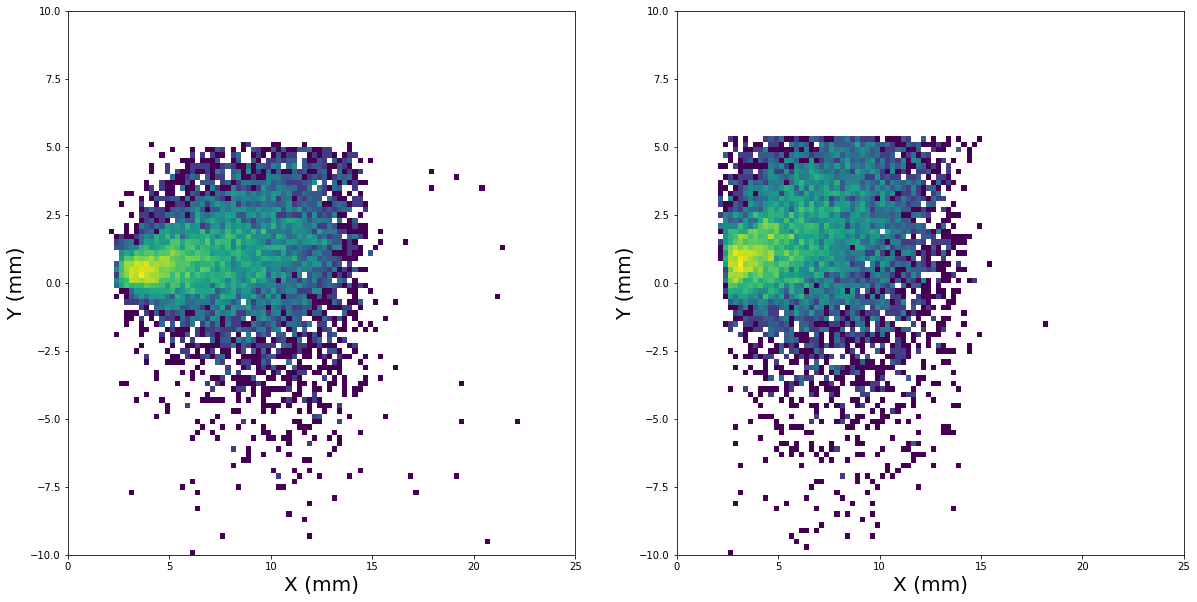

In [20]:
msk_protons_1 = ( df["Arm"] == 0 )
msk_protons_2 = ( df["Arm"] == 1 )
    
fig, axes = plt.subplots( 1, 2, figsize=(20,10) )
axes[0].hist2d( df[ "TrackX2" ][ msk_protons_1 ], df[ "TrackY2" ][ msk_protons_1 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[0].set_xlabel( "X (mm)", fontsize=20 )
axes[0].set_ylabel( "Y (mm)", fontsize=20 )
axes[1].hist2d( df[ "TrackX2" ][ msk_protons_2 ], df[ "TrackY2" ][ msk_protons_2 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[1].set_xlabel( "X (mm)", fontsize=20 )
axes[1].set_ylabel( "Y (mm)", fontsize=20 )